# DataSynthesizer Usage (independent attribute mode)

> This is a quick demo to use DataSynthesizer in independent attribute mode.

### Step 1 import packages

In [1]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file

import pandas as pd
%matplotlib inline

### Step 2 user-defined parameteres

In [2]:
# input dataset
input_data = './data/adult_reduced.csv'
# location of two output files
mode = 'independent_attribute_mode'
description_file = './out/{}/description.txt'.format(mode)
synthetic_data = './out/{}/sythetic_data.csv'.format(mode)

In [3]:
# default values set here, change here if needed

# An attribute is categorical if its domain size is less than this threshold.
# Here modify the threshold to adapt to the domain size of "education" (which is 14 in input dataset).
threshold_value_of_categorical_variable = 20 

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 32561 # Here 32561 is the same as input dataset, but it can be set to another number.

### Step 3 DataDescriber

1. Instantiate a DataDescriber.
2. Compute the statistics of the dataset.
3. Save dataset description to a file on local machine.

In [4]:
describer = DataDescriber(threshold_of_categorical_variable=threshold_value_of_categorical_variable)
describer.describe_dataset_in_independent_attribute_mode(input_data)
describer.save_dataset_description_to_file(description_file)

### Step 4 generate synthetic dataset

1. Instantiate a DataGenerator.
2. Generate a synthetic dataset.
3. Save it to local machine.

In [5]:
generator = DataGenerator()
generator.generate_dataset_in_independent_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

### Step 5 compare the statistics of input and sythetic data (optional)

The synthetic data is already saved in a file by step 4. The ModelInspector is for a quick test on the similarity between input and synthetic datasets.

#### 5.1 instantiate a ModelInspector.

It needs input dataset, synthetic dataset, and attribute description.

In [6]:
# Read both datasets using Pandas.
input_df = pd.read_csv(input_data)
synthetic_df = pd.read_csv(synthetic_data)
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

#### 5.2 compare histograms between input and synthetic datasets.

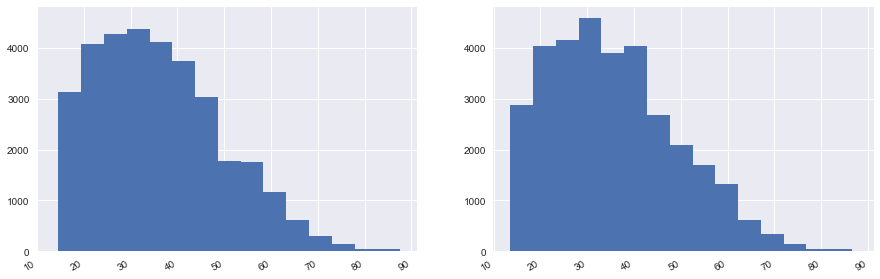

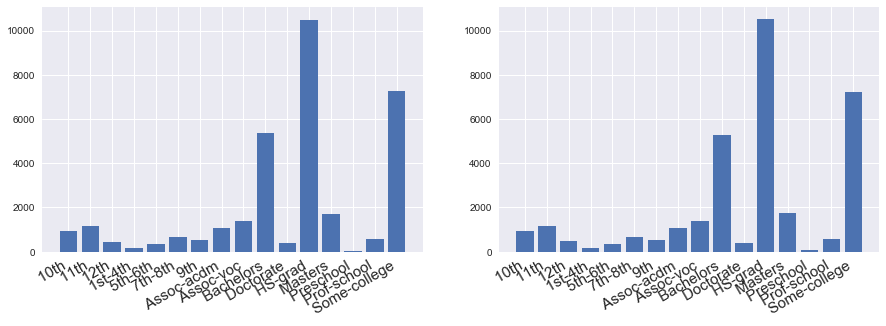

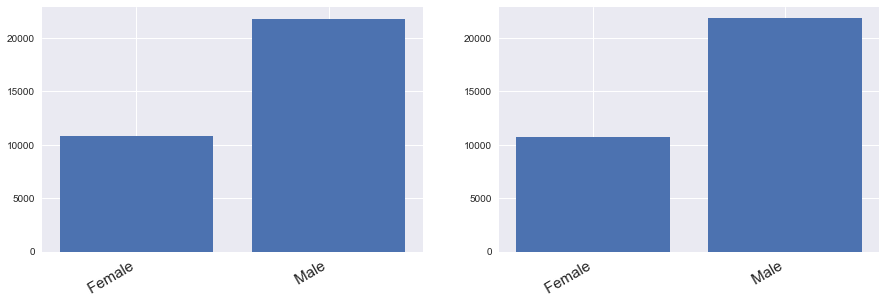

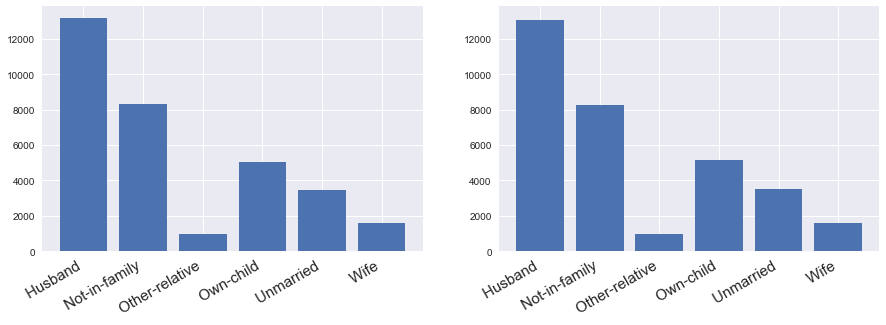

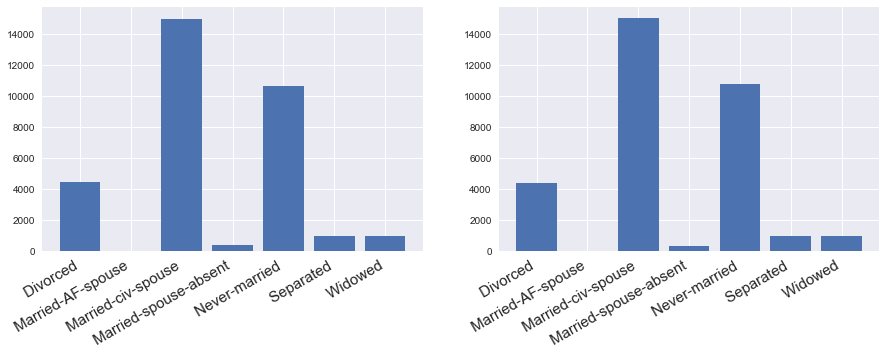

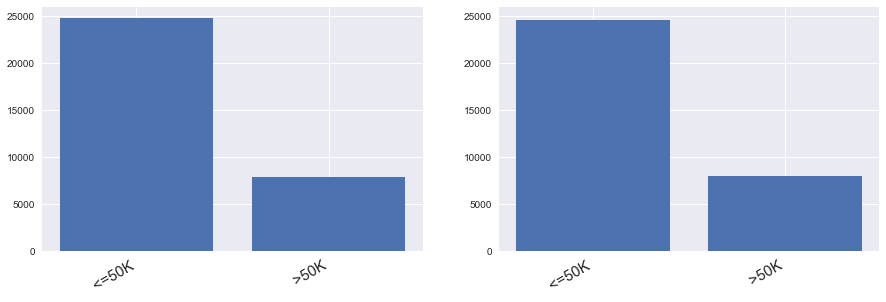

In [7]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

#### 5.3 compare pairwise mutual information

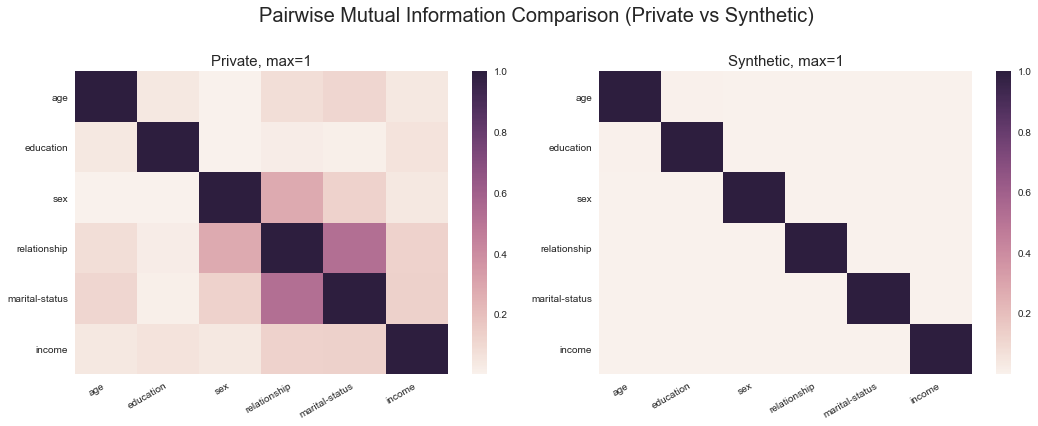

In [8]:
inspector.mutual_information_heatmap()